In [ ]:
# !pip install ipywidgets

In [2]:
# !pip install ydata-profiling

  Using cached ydata_profiling-4.12.1-py2.py3-none-any.whl.metadata (20 kB)
  Using cached jinja2-3.1.5-py3-none-any.whl.metadata (2.6 kB)
  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached dacite-1.8.1-py3-none-any.whl.metadata (15 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport


In [4]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.index

RangeIndex(start=0, stop=398, step=1)

In [6]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [7]:
df.values

array([[18.0, 8, 307.0, ..., 70, 'usa', 'chevrolet chevelle malibu'],
       [15.0, 8, 350.0, ..., 70, 'usa', 'buick skylark 320'],
       [18.0, 8, 318.0, ..., 70, 'usa', 'plymouth satellite'],
       ...,
       [32.0, 4, 135.0, ..., 82, 'usa', 'dodge rampage'],
       [28.0, 4, 120.0, ..., 82, 'usa', 'ford ranger'],
       [31.0, 4, 119.0, ..., 82, 'usa', 'chevy s-10']], dtype=object)

In [8]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [9]:
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
364,26.6,8,350.0,105.0,3725,19.0,81,usa,oldsmobile cutlass ls
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
334,23.7,3,70.0,100.0,2420,12.5,80,japan,mazda rx-7 gs
387,38.0,6,262.0,85.0,3015,17.0,82,usa,oldsmobile cutlass ciera (diesel)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [11]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [12]:
df.isnull().mean()

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      0.015075
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
name            0.000000
dtype: float64

In [13]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


리포트(작은 데이터나 샘플링한 데이터에서 활용)

In [14]:
# profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
# # Display the report
# profile.to_notebook_iframe()  # If running in a Jupyter notebook
# # OR
# profile.to_file("your_report.html")  # To save it as an HTML file

In [17]:
df['mpg'].unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [18]:
df['mpg'].nunique()

129

도수분포 == 빈도분포(Frequency distribution)    
히스토그램 : 도수 분포를 그림으로 그린것

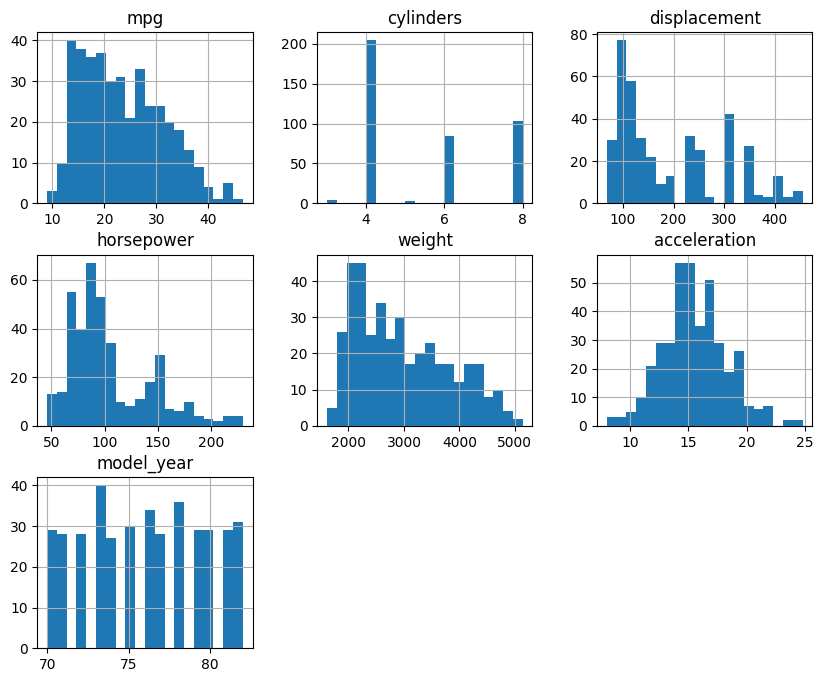

In [59]:
_ = df.hist(figsize=(10,8),
            bins = 20) # 막대 개수

### 비대칭도(왜도 - skew)
* 실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표
* 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있음
* 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포
* 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포
* 평균과 중앙값이 같으면 왜도는 0

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/700px-Negative_and_positive_skew_diagrams_%28English%29.svg.png" width="300">

출처 : https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84

In [31]:
# 양수 : 왼쪽 볼록 (오른쪽 꼬리)
# 음수 : 오른쪽 볼록 (왼쪽 꼬리)
df.skew(numeric_only=True)

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.087326
weight          0.531063
acceleration    0.278777
model_year      0.011535
dtype: float64

### 첨도 
* 확률분포의 뾰족한 정도를 나타내는 척도
* 관측치들이 어느 정도 집중적으로 중심에 몰려 있는가를 측정할 때 사용
* 첨도값(K)이 3에 가까우면 산포도가 정규분포에 가까움
* 3보다 작을 경우에는(K<3) 산포는 정규분포보다 더 뾰족한 분포(꼬리가 얇은 분포)
* 첨도값이 3보다 큰 양수이면(K>3) 정규분포보다 더 완만한 납작한 분포(꼬리가 두꺼운 분포)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/1920px-Normal_Distribution_PDF.svg.png" width="300">

출처 : https://ko.wikipedia.org/wiki/%EC%B2%A8%EB%8F%84


* [scipy.stats.kurtosis — SciPy Manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html)
* Fisher의 정의를 사용하면 결과에서 3.0을 빼서 정규 분포에 대해 0.0이 됩니다.
* True 이면 피셔의 정의가 사용됩니다(정상 ==> 0.0). False이면 Pearson의 정의가 사용됩니다(정상 ==> 3.0)


In [33]:
df.kurt(numeric_only=True)

mpg            -0.510781
cylinders      -1.376662
displacement   -0.746597
horsepower      0.696947
weight         -0.785529
acceleration    0.419497
model_year     -1.181232
dtype: float64

### 1개의 수치변수


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1280px-Boxplot_vs_PDF.svg.png" width="300">

이미지 출처 : https://en.wikipedia.org/wiki/Box_plot

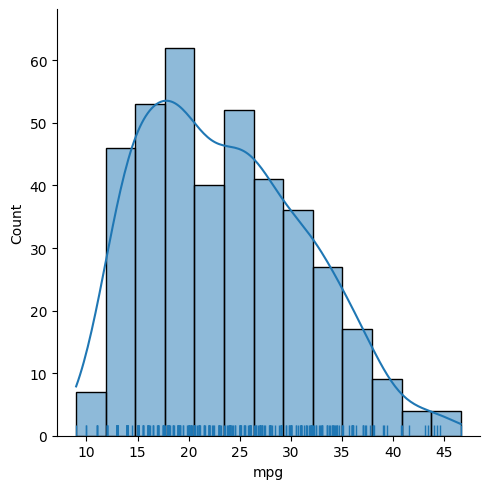

In [42]:
sns.displot(data=df, x='mpg', kde=True, rug=True) # 히스토그램 / kde = 선 / rug = 밑에 분포도
plt.show()

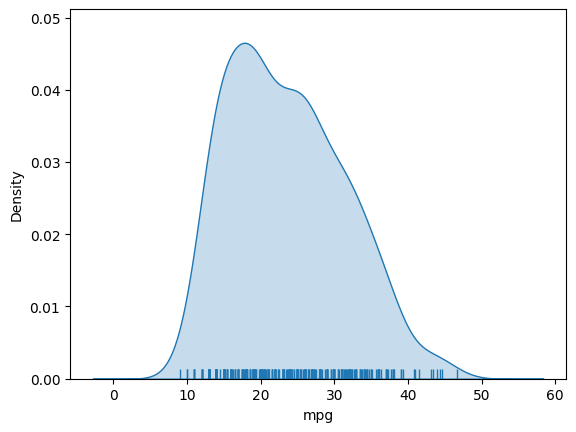

In [ ]:
sns.kdeplot(data=df, x='mpg', fill=True, cut=5) # 밀도함수
sns.rugplot(data=df, x='mpg') # 러그플롯(빈도 확인)
plt.show()

In [49]:
df['mpg'].agg(['skew', 'kurt'])

skew    0.457066
kurt   -0.510781
Name: mpg, dtype: float64

박스플롯   
- 제일 왼쪽 : 이상치를 제외한 최소값
- 박스 왼쪽 : 25%
- 박스 가운데 : 50%
- 박스 오른쪽 : 75%
- 제일 오른쪽 : 이상치를 제외한 최대값

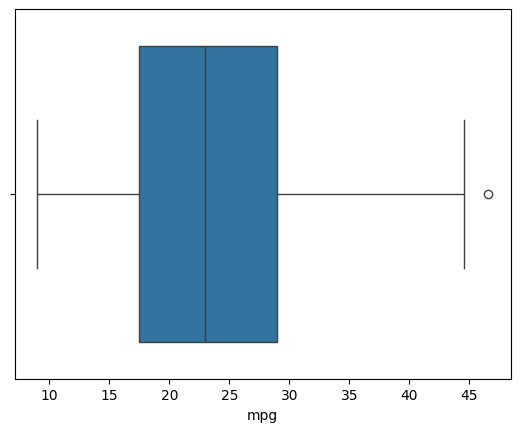

In [51]:
sns.boxplot(data=df, x='mpg')
plt.show()

In [52]:
df['mpg'].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [ ]:
df['mpg'].describe(include='object')

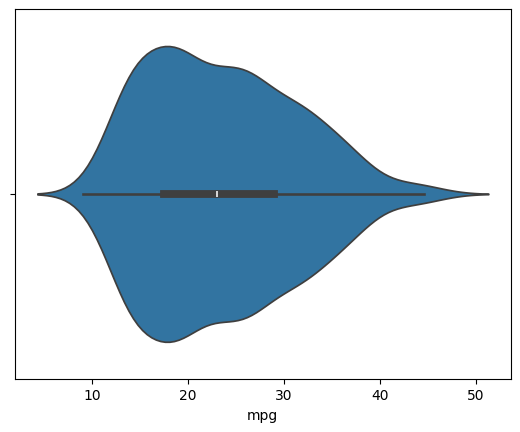

In [ ]:
# 밀도함수(kde)를 마주보게 그려둔 것
sns.violinplot(data=df, x='mpg')
plt.show()

<Axes: >

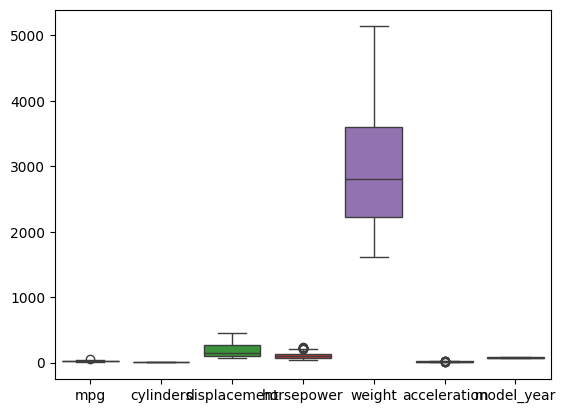

In [57]:
sns.boxplot(df)

### 범주형 분석

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = sns.load_dataset('mpg')

In [4]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

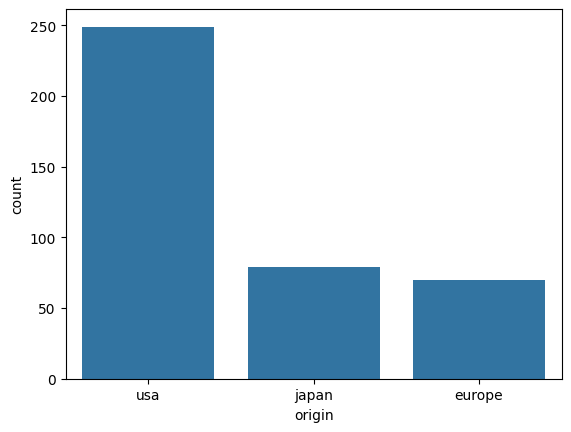

In [6]:
sns.countplot(data=df, x='origin')
plt.show()

In [7]:
df['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [8]:
df['origin'].value_counts(normalize=True)

usa       0.625628
japan     0.198492
europe    0.175879
Name: origin, dtype: float64

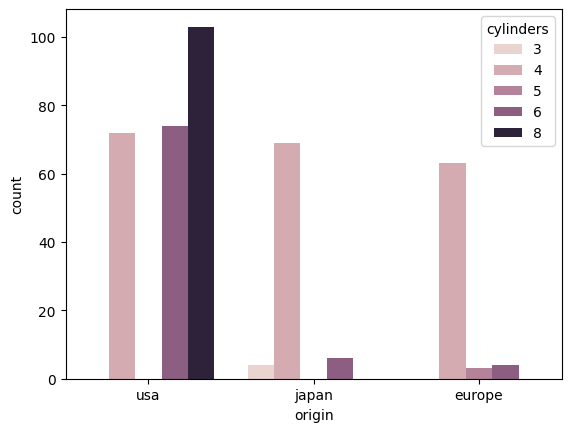

In [10]:
sns.countplot(data=df, x='origin', hue='cylinders')
plt.show()

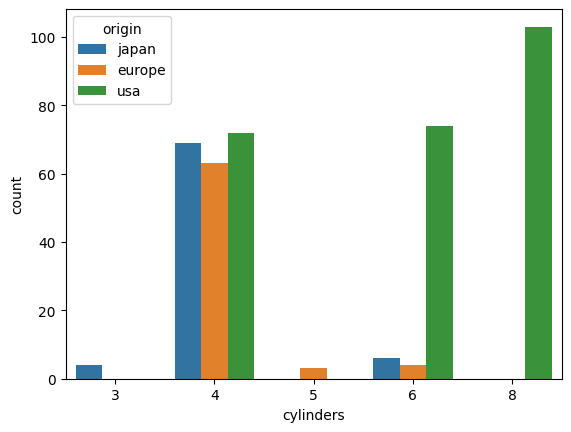

In [13]:
sns.countplot(data=df, x="cylinders", hue="origin")
plt.show()

In [14]:
# 시리즈값을 열, 인덱스에 넣어주는 것
pd.crosstab(df['origin'], df['cylinders'])

cylinders,3,4,5,6,8
origin,,,,,
europe,0,63,3,4,0
japan,4,69,0,6,0
usa,0,72,0,74,103


In [30]:
pd.pivot_table??

Signature:
pd.pivot_table(
    data: 'DataFrame',
    values=None,
    index=None,
    columns=None,
    aggfunc: 'AggFuncType' = 'mean',
    fill_value=None,
    margins: 'bool' = False,
    dropna: 'bool' = True,
    margins_name: 'str' = 'All',
    observed: 'bool' = False,
    sort: 'bool' = True,
) -> 'DataFrame'
Docstring:
Create a spreadsheet-style pivot table as a DataFrame.

The levels in the pivot table will be stored in MultiIndex objects
(hierarchical indexes) on the index and columns of the result DataFrame.

Parameters
----------
data : DataFrame
values : column to aggregate, optional
index : column, Grouper, array, or list of the previous
    If an array is passed, it must be the same length as the data. The
    list can contain any of the other types (except list).
    Keys to group by on the pivot table index.  If an array is passed,
    it is being used as the same manner as column values.
columns : column, Grouper, array, or list of the previous
    If an array is pa

In [32]:
pd.pivot_table(data=df, index='origin', values='mpg', aggfunc ='mean')

,mpg
origin,
europe,27.891429
japan,30.450633
usa,20.083534


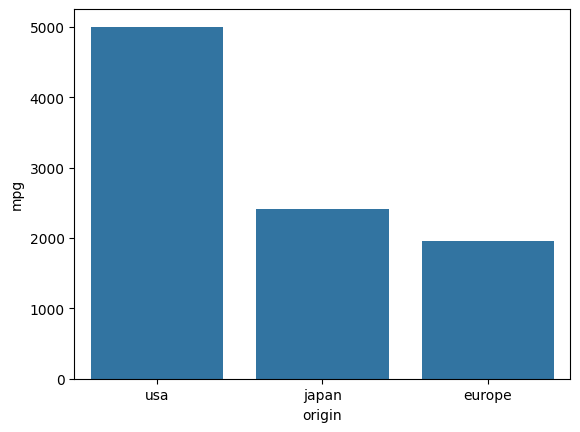

In [35]:
sns.barplot(data=df, x='origin', y='mpg' , estimator=np.sum, errorbar=None)
plt.show()

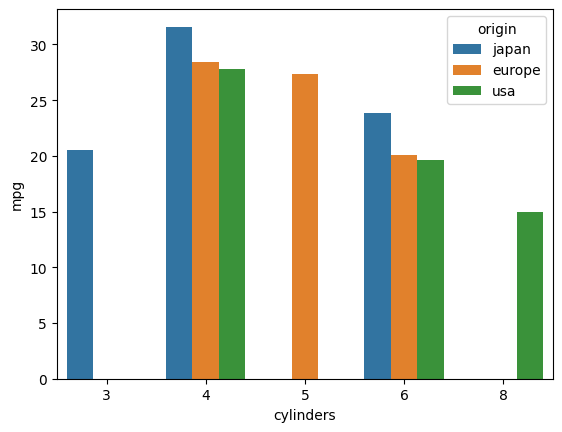

In [37]:
sns.barplot(data=df, x='cylinders', y='mpg', errorbar=None, hue = 'origin')
plt.show()

In [39]:
df.groupby(['cylinders','origin'])['mpg'].mean()


cylinders  origin
3          japan     20.550000
4          europe    28.411111
           japan     31.595652
           usa       27.840278
5          europe    27.366667
6          europe    20.100000
           japan     23.883333
           usa       19.663514
8          usa       14.963107
Name: mpg, dtype: float64

In [40]:
df.groupby(['cylinders','origin'])['mpg'].mean().unstack()

origin,europe,japan,usa
cylinders,,,
3,NaN,20.550000,NaN
4,28.411111,31.595652,27.840278
5,27.366667,NaN,NaN
6,20.100000,23.883333,19.663514
8,NaN,NaN,14.963107


In [47]:
# pivot : 연산 불가
# pivot_table : 연산 가능
pd.pivot_table(data=df, index='cylinders', columns='origin', values='mpg', aggfunc=['sum','mean'])

sum                       mean                      
origin     europe   japan     usa     europe      japan        usa
cylinders                                                         
3             NaN    82.2     NaN        NaN  20.550000        NaN
4          1789.9  2180.1  2004.5  28.411111  31.595652  27.840278
5            82.1     NaN     NaN  27.366667        NaN        NaN
6            80.4   143.3  1455.1  20.100000  23.883333  19.663514
8             NaN     NaN  1541.2        NaN        NaN  14.963107

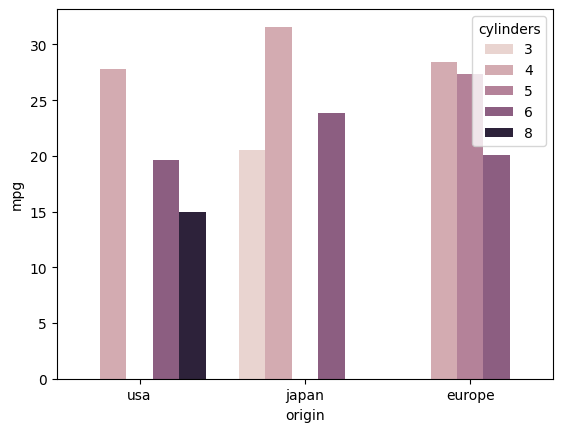

In [42]:
sns.barplot(data=df, x='origin',y='mpg', hue='cylinders', errorbar=None)
plt.show()

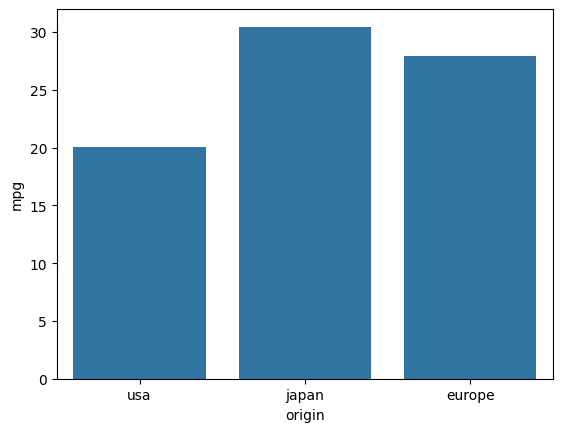

In [22]:
# errorbar=('ci', 95) = 신뢰구간 95%
sns.barplot(data=df, x='origin',y='mpg', estimator=np.mean, errorbar=None)
plt.show()

In [23]:
df.groupby('origin').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
origin,,,,,,,
europe,27.891429,4.157143,109.142857,80.558824,2423.300000,16.787143,75.814286
japan,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038
usa,20.083534,6.248996,245.901606,119.048980,3361.931727,15.033735,75.610442


In [24]:
df.groupby('origin')['mpg'].mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

In [29]:
df.groupby(['origin','mpg']).sum()

cylinders  displacement  horsepower  weight  acceleration  \
origin mpg                                                               
europe 16.2          6         163.0       133.0    3410          15.8   
       16.5          6         168.0       120.0    3820          16.7   
       17.0          6         163.0       125.0    3140          13.6   
       18.0          4         121.0       112.0    2933          14.5   
       19.0          8         241.0       200.0    6138          37.4   
...                ...           ...         ...     ...           ...   
usa    35.7          4          98.0        80.0    1915          14.4   
       36.0          8         233.0       154.0    4495          30.3   
       36.1          4          98.0        66.0    1800          14.4   
       38.0         10         367.0       148.0    5140          31.7   
       39.0          4          86.0        64.0    1875          16.4   

             model_year  
origin mpg               
europe 16.2          78  
       16.5          76  
       17.0          78  
       18.0          72  
       19.0         149  
...                 ...  
usa    35.7          79  
       36.0         164  
       36.1          78  
       38.0         164  
       39.0          81  

[178 rows x 6 columns]

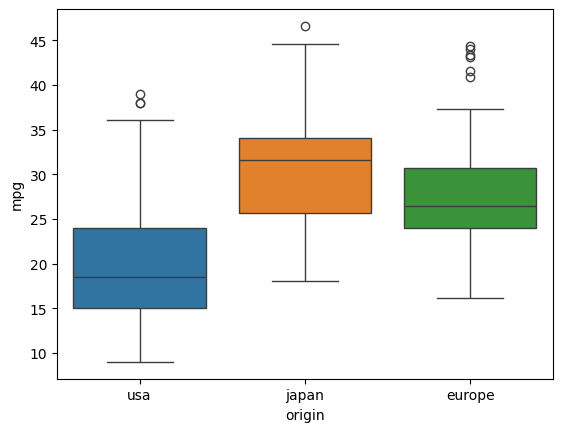

In [50]:
sns.boxplot(data=df, x='origin', y='mpg', hue='origin')
plt.show()

In [54]:
origin_desc= df.groupby("origin")['mpg'].describe()
origin_desc

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,70.0,27.891429,6.723930,16.2,24.0,26.5,30.65,44.3
japan,79.0,30.450633,6.090048,18.0,25.7,31.6,34.05,46.6
usa,249.0,20.083534,6.402892,9.0,15.0,18.5,24.00,39.0


In [59]:
europe = origin_desc.loc['europe']
europe


count    70.000000
mean     27.891429
std       6.723930
min      16.200000
25%      24.000000
50%      26.500000
75%      30.650000
max      44.300000
Name: europe, dtype: float64

In [60]:
Q3 = europe["75%"]
Q1 = europe["25%"]
IQR = Q3 - Q1
OUT_MAX = Q3 + (1.5*IQR)
OUT_MIN = Q1 - (1.5*IQR)
OUT_MAX, OUT_MIN


(40.625, 14.025000000000002)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

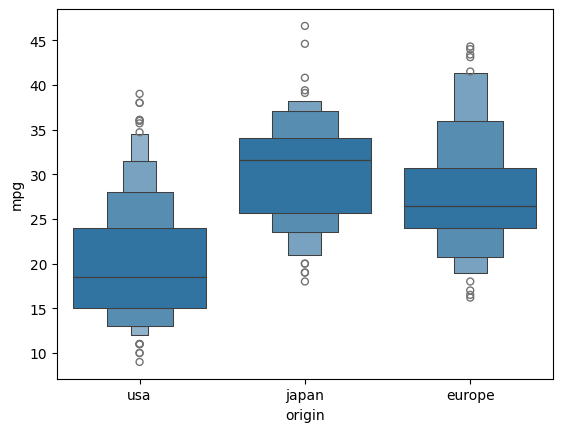

In [61]:
sns.boxenplot(data=df, x='origin', y='mpg')

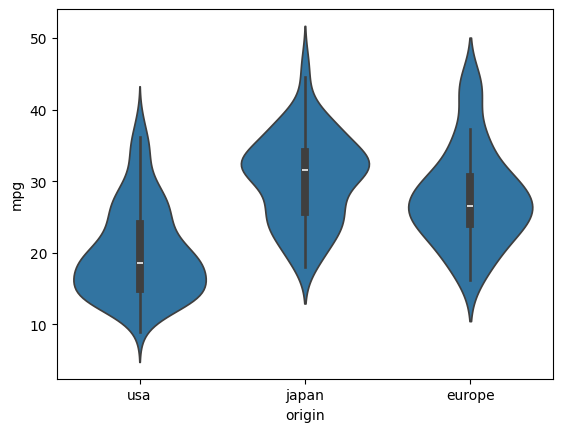

In [63]:
sns.violinplot(data=df, x='origin', y='mpg')
plt.show()

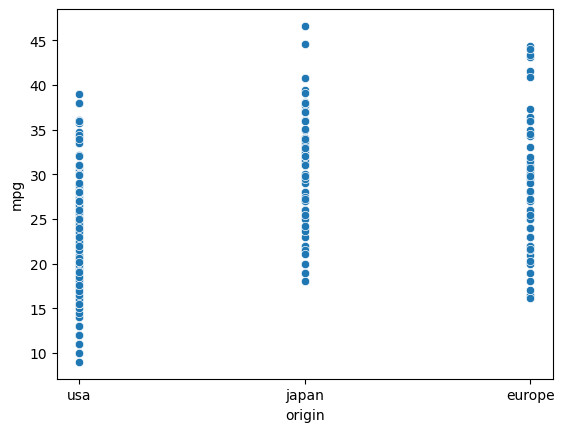

In [64]:
# 범주형에 적합하지 않아요
sns.scatterplot(data=df, x="origin", y="mpg")
plt.show()

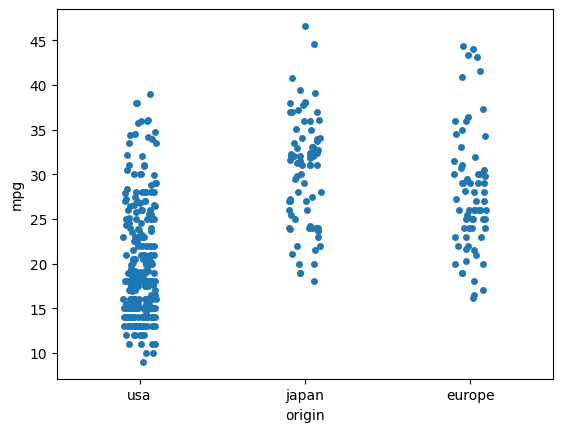

In [ ]:
# 범주형에 안씀
sns.stripplot(data=df, x="origin", y="mpg")
plt.show()

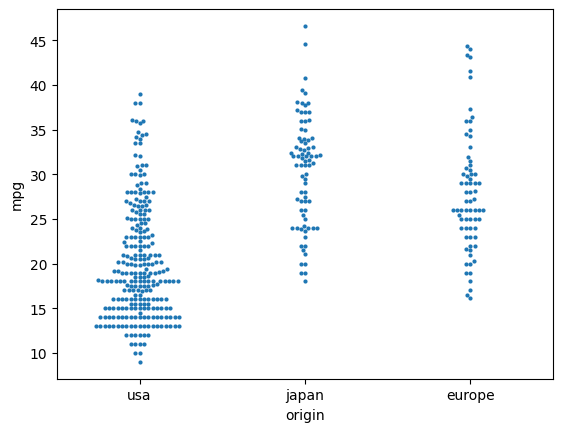

In [ ]:
# 바이올린 플롯과 비슷
sns.swarmplot(data=df, x='origin', y='mpg', size=3) # 사이즈는 점 크기 줄여주는 것
plt.show()

catplot을 통한 범주형 데이터의 서브플롯 시각화   
<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png" width="500">

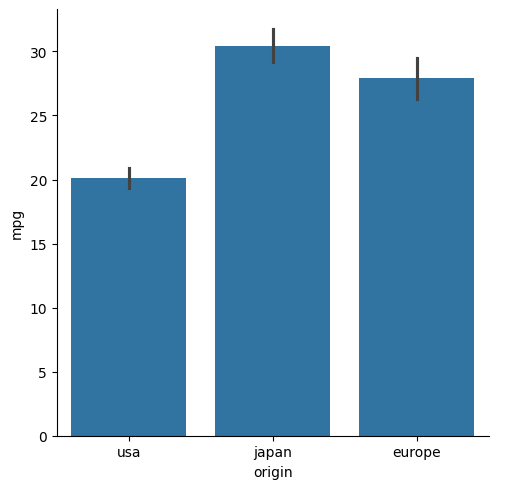

In [69]:
sns.catplot(data=df, x="origin", y="mpg", kind='bar') # kind는 종류 bar box violin, stritp 등등
plt.show()

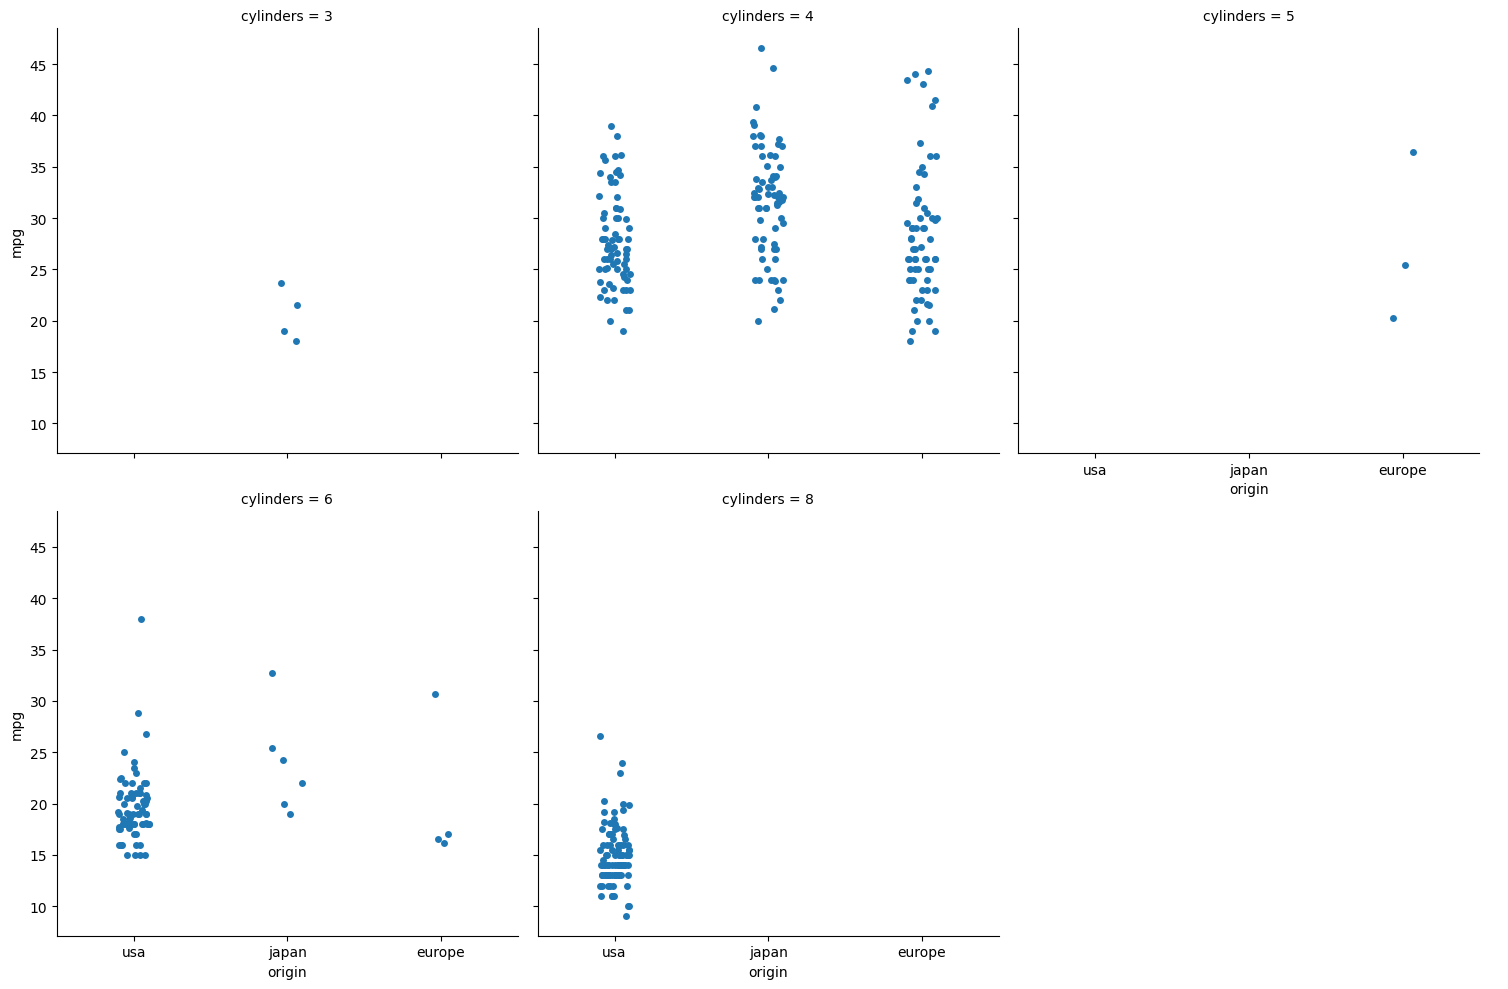

In [ ]:
# col별 데이터 서브 플롯 그려줌, col_wrap = 한줄 개수
sns.catplot(data=df, x="origin", y="mpg", col='cylinders', col_wrap=3)
plt.show()

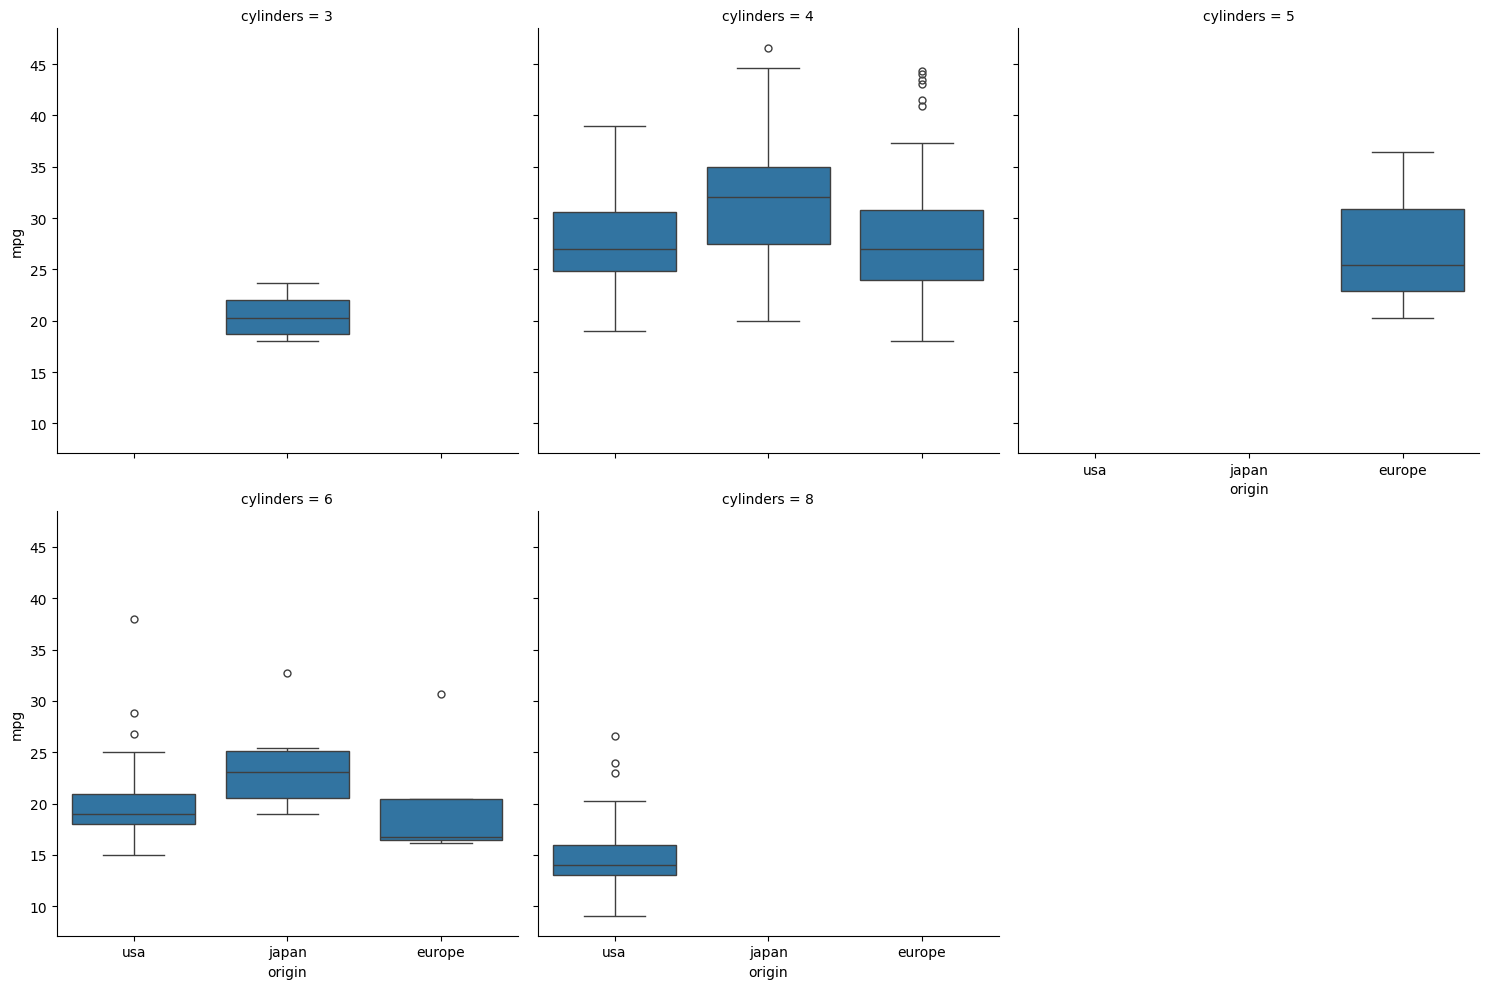

In [72]:
sns.catplot(data=df, x="origin", y="mpg", col='cylinders', col_wrap=3, kind='box')
plt.show()

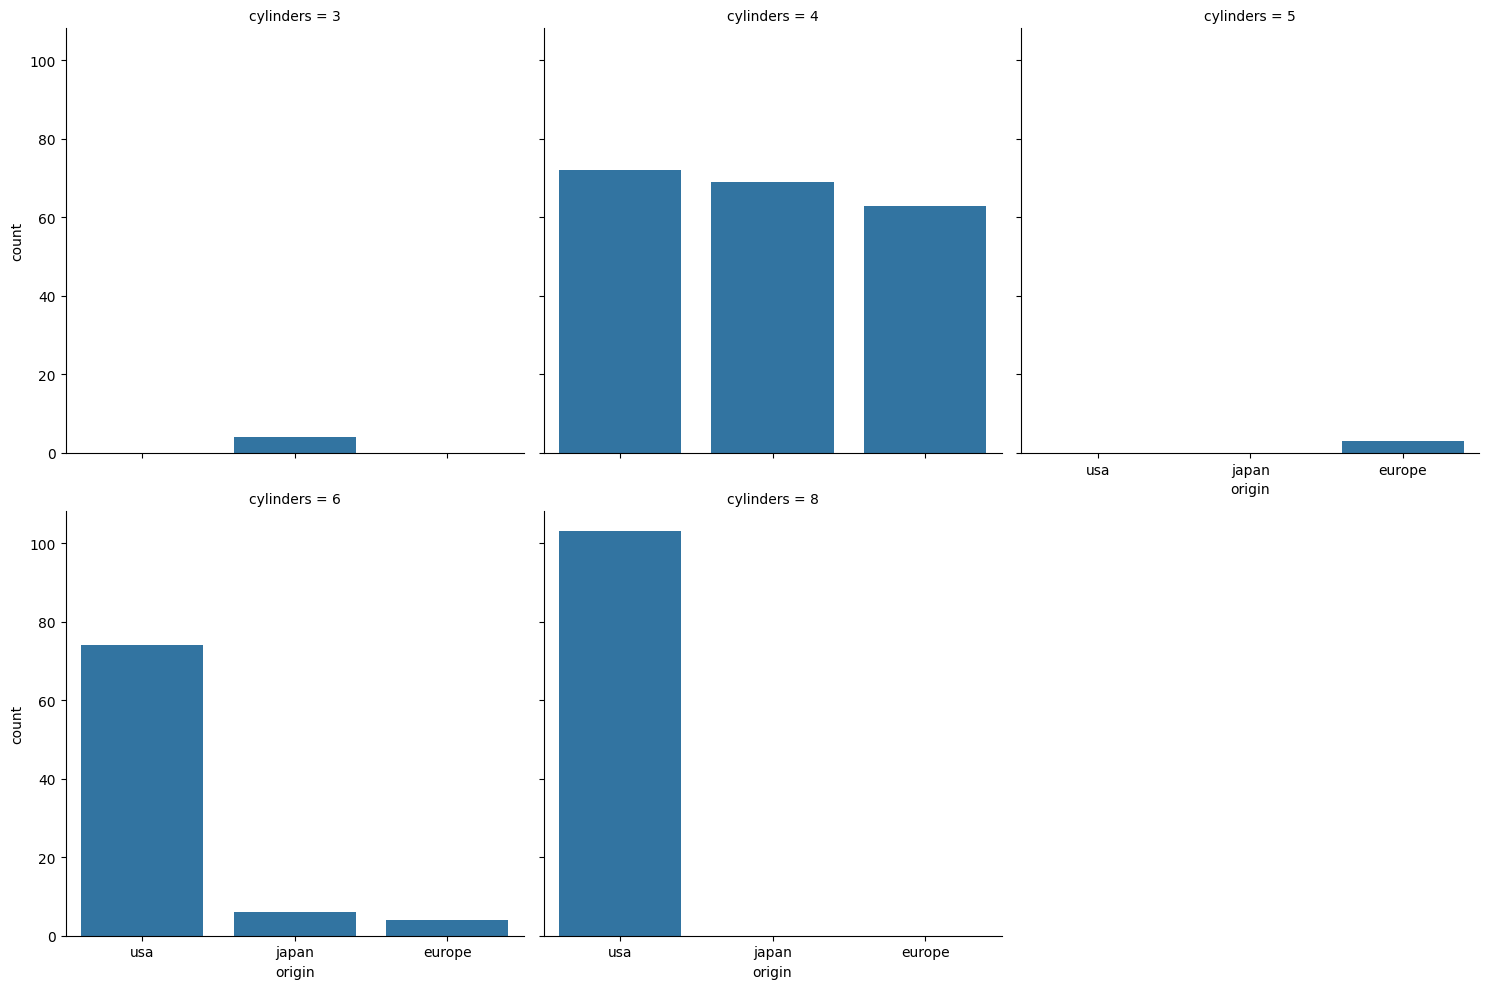

In [73]:
# count plot은 x축이나 y축 하나만 넣어도 가능
sns.catplot(data=df, x="origin", col='cylinders', col_wrap=3, kind='count')
plt.show()

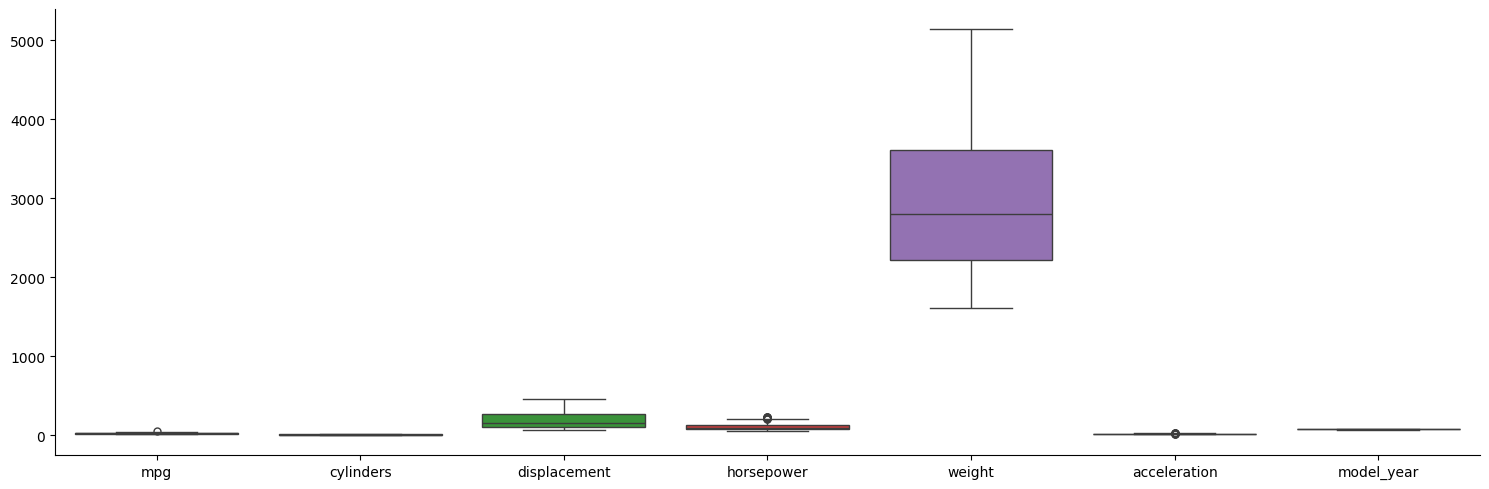

In [ ]:
# 전체 데이터 그래프 그리기 
sns.catplot(data=df, kind='box', aspect=3) # aspect=사이즈 값 
plt.show()